Morphology 2 Synaptic activity

In [1]:
# 04 - Synaptic activity, Parallel fibers, ascending axons, mossy fibers and inibition.
import matplotlib.pyplot as plt
from neuron import h
from Golgi2020_morpho_1 import Golgi_morpho_1
import multiprocessing
import random as rnd
import numpy as np

In [2]:
seed = 123456
rnd.seed(seed)
h.use_mcell_ran4(1)
h.mcell_ran4_init(seed)

0.0

In [3]:
#Instantiation of the cell template
subtype_2 = "morpho_2"
cell_2 = Golgi_morpho_1(subtype_2)
#fixed time step only
Fixed_step = h.CVode()
Fixed_step.active(0)


5456 lines read

morphology/pair-140514-C2-1_split_2.asc problems


Main branch starting at line 58 is outside the soma bounding boxes
  Making a logical connection to center of nearest soma

Main branch starting at line 2375 is outside the soma bounding boxes
  Making a logical connection to center of nearest soma


False

In [4]:
#this code discover the number of cores available in a CPU and activate the multisplit to use them all.
cpu = multiprocessing.cpu_count() // 2
h.load_file("parcom.hoc")
p = h.ParallelComputeTool()
p.change_nthread(cpu,1)
p.multisplit(1)
stimdata = dict()
stimdata['timeglobal'] =  3000

In [7]:
#Number of spikes, interval, starting moment and presence of noise
synapsesdata = dict()

#parallel fiber
synapsesdata['syninterval'] = 10
synapsesdata['synnumber'] = 5
synapsesdata['synstart'] = 1000
synapsesdata['synnoise'] = 0

#mossy fiber
synapsesdata['syninterval_mf'] = 10
synapsesdata['synnumber_mf'] = 5
synapsesdata['synstart_mf'] = 1000
synapsesdata['synnoise_mf'] = 0

#ascending axon
synapsesdata['syninterval_aa'] = 10
synapsesdata['synnumber_aa'] = 5
synapsesdata['synstart_aa'] = 1000
synapsesdata['synnoise_aa'] = 0

#Delay factor to activate two different type of synapses in two different moments.
synapsesdata['synpfdelay'] = 0
synapsesdata['synmfdelay'] = 0

synapsesdata['synaadelay'] = 0
synapsesdata['synindelay'] = 0

#number of synapses (max used in the paper)
pf_syn = 89 #89
mf_syn = 0 #20

aa_syn = 0 #20
inib_syn = 0 #20

cell_2.createsyn(pf_syn, mf_syn, aa_syn, subtype_2)

self.dend_pf 128
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!!!!!
SOURCE TYPE DOES NOT EXIST SOMETHING WRONG!!!!!

In [8]:
#PF syn
spk_stim_pf = []
totalstim = int(stimdata['timeglobal']/  synapsesdata['synstart'])

for j in range(int(totalstim)):
    spk_stim = h.NetStim()
    spk_stim.interval=synapsesdata['syninterval']
    spk_stim.number=synapsesdata['synnumber']
    spk_stim.noise=synapsesdata['synnoise']
    spk_stim.start=(synapsesdata['synstart'] * (totalstim - j)) + synapsesdata['synpfdelay']
    
    spk_stim_pf.append(spk_stim)
    spk_nc_pfsyn = []
    j = j-1

print('len pf', len(cell.L_PF))

for m in range(int(totalstim)):	
    spk_nc_pfsyn.append([h.NetCon(spk_stim_pf[m],PF.input,0,0.1,1) for PF in cell.L_PF])


#MF syn
spk_stim_mf = []
totalstim1 = int(stimdata['timeglobal']/  synapsesdata['synstart_mf'])

for j in range(int(totalstim1)):
    spk_stim_2 = h.NetStim()
    spk_stim_2.interval=synapsesdata['syninterval_mf']
    spk_stim_2.number=synapsesdata['synnumber_mf']
    spk_stim_2.noise=synapsesdata['synnoise_mf']
    spk_stim_2.start=(synapsesdata['synstart_mf'] * (totalstim1 - j))   + synapsesdata['synmfdelay'] 
    
    spk_stim_mf.append(spk_stim_2)
    spk_nc_mfsyn = []
    spk_nc_mfsyn_B = []
    j = j-1

print('len mf', len(cell.L_MF))

for v in range(int(totalstim1)):	
    spk_nc_mfsyn.append([h.NetCon(spk_stim_mf[v],MF.input,0,0.1,1) for MF in cell.L_MF])
    spk_nc_mfsyn_B.append([h.NetCon(spk_stim_mf[v],MF_nmda_B.input,0,0.1,1) for MF_nmda_B in cell.L_MF_NMDA_B])

len pf 89
len mf 0


In [9]:
#AA syn
spk_stim_aa = []
totalstim_aa = int(stimdata['timeglobal']/  synapsesdata['synstart_aa'])

for j in range(int(totalstim_aa)):
    spk_stim_2 = h.NetStim()
    spk_stim_2.interval=synapsesdata['syninterval_aa']
    spk_stim_2.number=synapsesdata['synnumber_aa']
    spk_stim_2.noise=synapsesdata['synnoise_aa']
    spk_stim_2.start=(synapsesdata['synstart_aa'] * (totalstim_aa - j))   + synapsesdata['synaadelay'] 
    
    spk_stim_aa.append(spk_stim_2)
    spk_nc_aasyn = []
    spk_nc_aasyn_B = []
    j = j-1

print('len aa', len(cell.L_AA))

for z in range(int(totalstim_aa)):	
    spk_nc_aasyn.append([h.NetCon(spk_stim_aa[z],AA.input,0,0.1,1) for AA in cell.L_AA])
    spk_nc_aasyn_B.append([h.NetCon(spk_stim_aa[z],MF_nmda_B.input,0,0.1,1) for MF_nmda_B in cell.L_AA_NMDA_B])

len aa 0


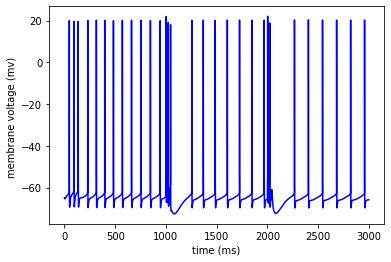

In [10]:
#Basic properties of the simulation. dt, temperature, sim duration and initial voltage
h.dt = 0.025
h.celsius = 32
h.tstop = stimdata['timeglobal']
h.v_init = -65

#Initialization 
def initialize():
    h.finitialize()
    h.run()
    
initialize()


#Save a time voltage trace which will be different based on the number and type of active synapses
def save_trace(time_vec, vm_vec, pf_n, aa_n, mf_n, inib_n):
    
    np.savetxt('04_trace_indiv_syn_pf_' + str(pf_n) + '_mf_' + str(mf_n) + '_aa_' + str(aa_n) + '_inib_' + str(inib_n) + '_morpho_2.txt', np.column_stack((time_vec,vm_vec)), delimiter = ' ')
    
    fig, ax = plt.subplots()
    ax.plot(time_vec, vm_vec, 'b', label='spikes')

    plt.xlabel("time (ms)")
    plt.ylabel("membrane voltage (mv) ")
    
    
save_trace(np.array(cell.time_vector), np.array(cell.vm), pf_syn, aa_syn, mf_syn, inib_syn)